# Desafio Cientista de Dados

### Previsão de Precificação de Alugueis de Casas em NY

#### Contexto

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

**Objetivo:** Desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.

**Descrição das colunas do dataset:**

1. id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
2. nome - Representa o nome do anúncio
3. host_id - Representa o id do usuário que hospedou o anúncio
4. host_name – Contém o nome do usuário que hospedou o anúncio
5. bairro_group - Contém o nome do bairro onde o anúncio está localizado
6. bairro - Contém o nome da área onde o anúncio está localizado
7. latitude - Contém a latitude do local
8. longitude - Contém a longitude do local
9. room_type – Contém o tipo de espaço de cada anúncio
10. price - Contém o preço por noite em dólares listado pelo anfitrião
11. minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
12. numero_de_reviews - Contém o número de comentários dados a cada listagem
13. ultima_review - Contém a data da última revisão dada à listagem
14. reviews_por_mes - Contém o número de avaliações fornecidas por mês
15. calculado_host_listings_count - Contém a quantidade de listagem por host
16. disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

## Importando as bibliotecas

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import joblib

## Fazendo ajuste do estilo dos gráficos para padronização

In [9]:
sns.set(style = 'darkgrid')
color = '#0081be'

## Carregando os dados

In [12]:
precificacao = pd.read_csv('data/teste_indicium_precificacao.csv')

## 1. Análise Exploratória dos Dados (EDA)

#### Visualizando e explorando os 5 primeiros registros do dataset

Assim, podemos ter uma primeira visualização de quais dados a tabela nos trouxe, e que serão utilizados para construir as análises.

In [16]:
precificacao.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


#### Entendendo a estrutura dos dados

Conferindo se o panda interpretou os dados de maneira correta e se existem dados nulos.

In [19]:
precificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Podemos observar que o dataset tem 48.894 registros e 16 colunas, sendo que algumas colunas contém valores ausentes, como **nome, host_name, ultima_review** e **reviews_por_mes**

#### Verificando e contando os valores ausentes/nulos (NaN)

In [23]:
precificacao.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Podemos análisar os impactos dos dados faltantes, da seguinte forma:

- **nome** (16 valores ausentes/nulos): Pode dificultar a identificação do anúncio, mas não afeta diretamente a análise de preços ou disponibilidade.
- **host_name** (21 valores ausentes/nulos): Pode dificultar a análise de anfitriões e sua reputação, mas o host_id ainda está presente para identificação única.
- **ultima_review** (10.052 valores ausentes/nulos) e **reviews_por_mes** (10.052 valores ausentes/nulos): Esses dados ausentes sugerem que há muitos anúncios sem avaliações. Isso pode indicar listagens novas, pouco populares ou inativas.

Todas as outras colunas estão completas, garantindo que não há perda de informações essenciais.

####  Verificando se existem linhas duplicadas, ou seja, se existem registros idênticos em todas as colunas

In [27]:
precificacao.duplicated().sum()

0

O resultado indica que não há linhas duplicadas na base de dados. Isso significa que cada registro é único em todas as colunas, garantindo que não há repetições.

#### Calculando um conjunto de estatísticas descritivas para cada coluna numérica do dataset

In [31]:
precificacao.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Verificamdo as colunas necessárias para a proposta do desafio, ou seja, price, minimo_noites e disponiblidade_365. Temos as seguintes observações:

**price**

- Mediana: $106, a maioria das acomodações cobra algo próximo desse valor.
  
- Média: $152, valores extremos estão puxando a média para cima.
  
- Máximo: $10.000, possível outlier.

**minimo_noites**

- Mediana: 3 noites, a maioria dos anúncios exige pelo menos 3 noites de estadia.
  
- Média: 7 noites, valores extremos estão puxando a média para cima.

- Máximo: 1.250 noites, possível outlier.

**disponibilidade_365**

- Mediana: 45 dias, a maioria das acomodações está disponível apenas em períodos curtos.
  
- Média: 112 dias, algumas acomodações estão disponíveis o ano todo, elevando a média.

- Máximo: 365 dias, algumas listagens estão sempre disponíveis.

#### Visualização de Outliers

Gerando boxplots para identificar valores extremos nas colunas **price** e **minimo_noites**

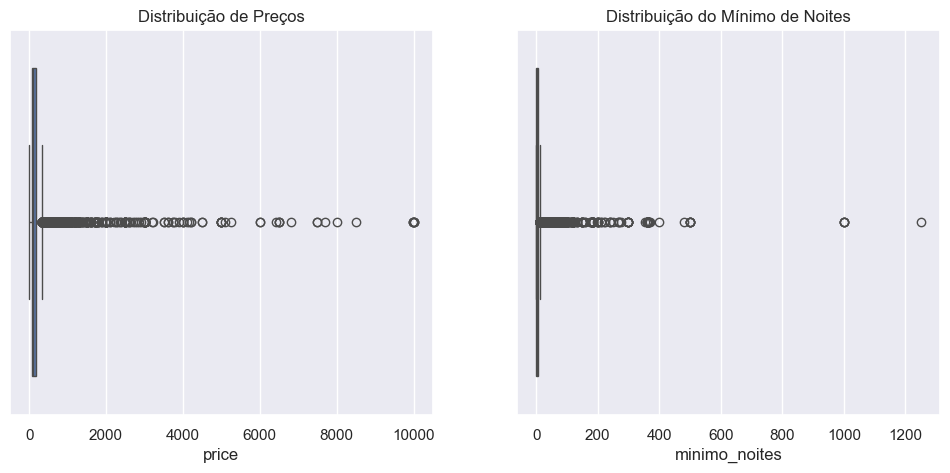

In [35]:
plt.figure(figsize=(12, 5))

# Preço
plt.subplot(1, 2, 1)
sns.boxplot(x=precificacao['price'])
plt.title('Distribuição de Preços')

# Mínimo de noites
plt.subplot(1, 2, 2)
sns.boxplot(x=precificacao['minimo_noites'])
plt.title('Distribuição do Mínimo de Noites')

plt.show()

Observamos que há valores extremamente altos (outliers) que podem distorcer a análise.

#### Tratamento dos dados ausentes/nulos (NaN) - nome, host_name, ultima_review e reviews_por_mes

In [39]:
precificacao_tratado = precificacao.drop(columns=['host_name']).copy()
precificacao_tratado.loc[:, "nome"] = precificacao["nome"].fillna("Desconhecido")
precificacao_tratado.loc[:, "ultima_review"] = precificacao["ultima_review"].fillna("Sem avaliação")
precificacao_tratado.loc[:, "reviews_por_mes"] = precificacao["reviews_por_mes"].fillna(0)

#### Dados após tratamento dos dados ausentes/nulos (NaN)

In [44]:
precificacao_tratado.head()

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Sem avaliação,0.00,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [46]:
precificacao_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48894 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   bairro_group                   48894 non-null  object 
 4   bairro                         48894 non-null  object 
 5   latitude                       48894 non-null  float64
 6   longitude                      48894 non-null  float64
 7   room_type                      48894 non-null  object 
 8   price                          48894 non-null  int64  
 9   minimo_noites                  48894 non-null  int64  
 10  numero_de_reviews              48894 non-null  int64  
 11  ultima_review                  48894 non-null  object 
 12  reviews_por_mes                48894 non-null 

In [48]:
precificacao_tratado.isnull().sum()

id                               0
nome                             0
host_id                          0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

#### Remoção de Outliers

In [54]:
# Calculando limites para remoção de outliers usando IQR
q1_price = precificacao_tratado['price'].quantile(0.25)
q3_price = precificacao_tratado['price'].quantile(0.75)
IQR_price = q3_price - q1_price

q1_minimo_noites = precificacao_tratado['minimo_noites'].quantile(0.25)
q3_minimo_noites = precificacao_tratado['minimo_noites'].quantile(0.75)
IQR_minimo_noites = q3_minimo_noites - q1_minimo_noites

# Definindo limites
lower_price = q1_price - 1.5 * IQR_price
upper_price = q3_price + 1.5 * IQR_price

lower_minimo_noites = q1_minimo_noites - 1.5 * IQR_minimo_noites
upper_minimo_noites = q3_minimo_noites + 1.5 * IQR_minimo_noites

# Filtrando dataset removendo outliers
precificacao_filtrada= precificacao_tratado[(precificacao_tratado['price'] >= lower_price) & (precificacao_tratado['price'] <= upper_price)]
precificacao_filtrada = precificacao_filtrada[(precificacao_filtrada['minimo_noites'] >= lower_minimo_noites) & (precificacao_filtrada['minimo_noites'] <= upper_minimo_noites)]

# Exibindo quantos registros foram removidos
print(f"Registros removidos: {len(precificacao_tratado) - len(precificacao_filtrada)}")

Registros removidos: 9157


#### Dados após tratamento dos Outliers

In [56]:
precificacao_filtrada.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,3.973700e+04,3.973700e+04,39737.000000,39737.000000,39737.000000,39737.000000,39737.000000,39737.000000,39737.000000,39737.000000
mean,1.883394e+07,6.621806e+07,40.727575,-73.949145,119.000503,2.696203,26.377985,1.232149,3.072980,97.163097
std,1.084300e+07,7.750213e+07,0.056293,0.047709,67.184941,1.863541,47.475170,1.683497,19.744108,124.360620
min,2.595000e+03,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.415568e+06,7.824750e+06,40.688080,-73.981040,65.000000,1.000000,1.000000,0.070000,1.000000,0.000000
50%,1.947313e+07,3.073664e+07,40.720080,-73.953320,100.000000,2.000000,7.000000,0.510000,1.000000,25.000000
75%,2.861317e+07,1.036119e+08,40.763260,-73.932170,155.000000,3.000000,29.000000,1.890000,2.000000,179.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,11.000000,629.000000,58.500000,327.000000,365.000000


#### Distribuição de preços

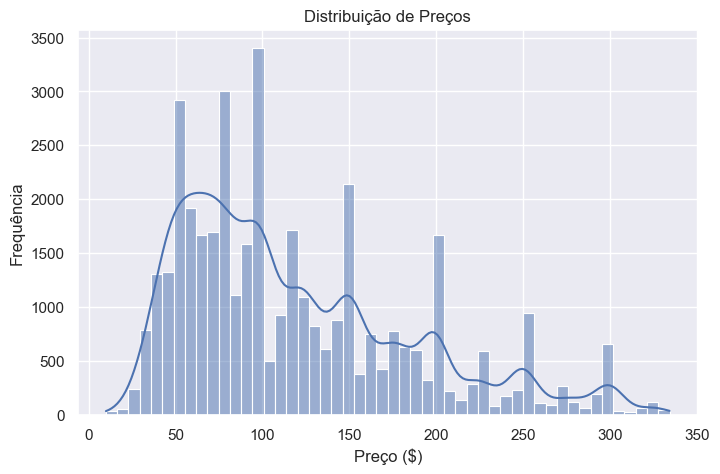

In [83]:
plt.figure(figsize=(8,5))
sns.histplot(precificacao_filtrada[precificacao_filtrada['price'] > 0]['price'], bins=50, kde=True)
plt.title("Distribuição de Preços")
plt.xlabel("Preço ($)")
plt.ylabel("Frequência")

plt.show()

#### Preço por tipo de acomodação

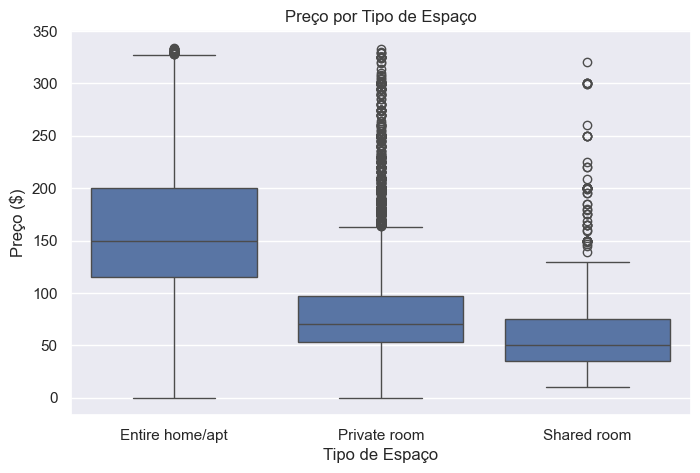

In [81]:
plt.figure(figsize=(8,5))
sns.boxplot(x="room_type", y="price", data=precificacao_filtrada)
plt.title("Preço por Tipo de Espaço")
plt.xlabel("Tipo de Espaço")
plt.ylabel("Preço ($)")

plt.show()

O tipo de espaço influencia significativamente o preço dos imóveis em Nova York.

#### Correlação entre as variáveis

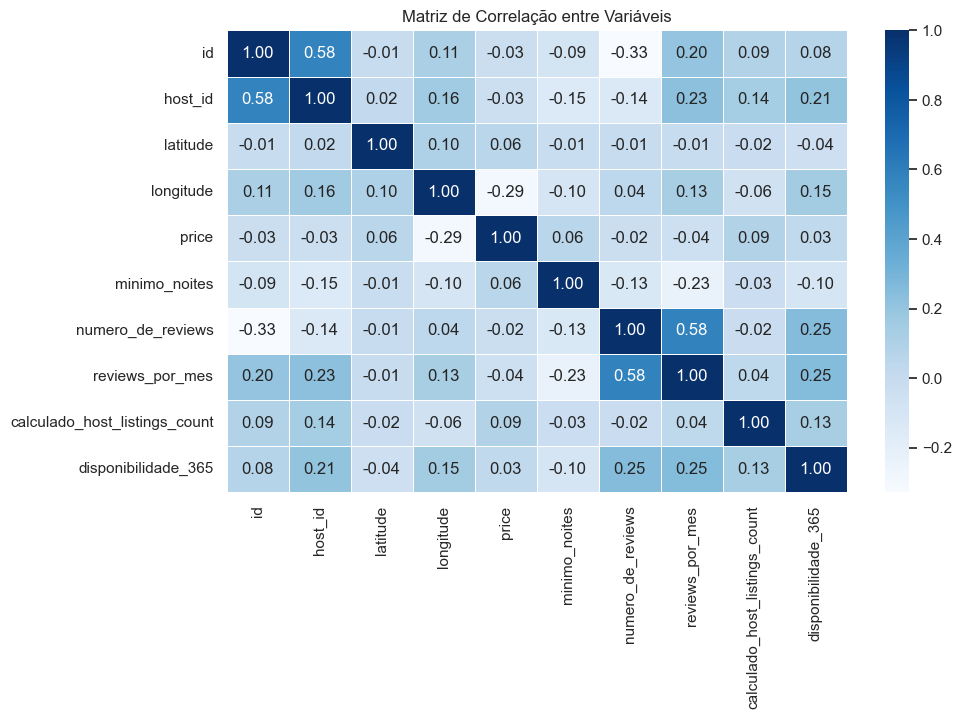

In [85]:
corr_matrix = precificacao_filtrada.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis")

plt.show()

Nenhuma das variáveis analisadas individualmente apresenta uma correlação forte com o preço. Isso sugere que o preço é influenciado por uma combinação de fatores, e não apenas por uma única variável.

 ## 2. Respondendo as perguntas

#### a) Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

##### Relação entre bairro e preço

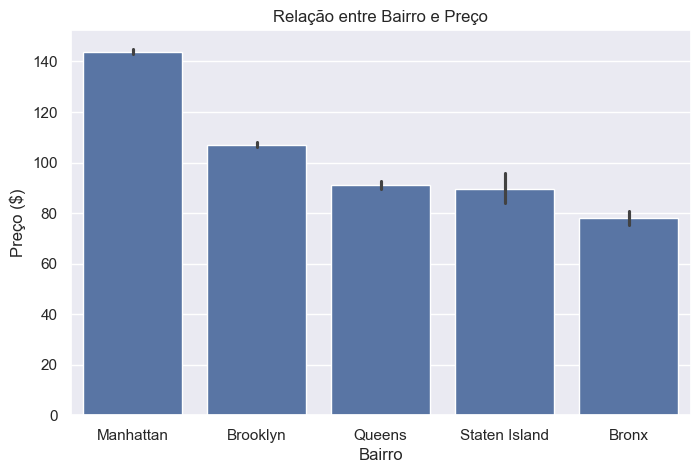

In [79]:
plt.figure(figsize=(8,5))
sns.barplot(x="bairro_group", y='price', data=precificacao_filtrada)
plt.title('Relação entre Bairro e Preço')
plt.xlabel('Bairro')
plt.ylabel('Preço ($)')

plt.show()

O bairro influencia significativamente o preço dos imóveis. A localização tem um impacto significativo no preço. Proximidade de metrôs, pontos turísticos e áreas comerciais pode influenciar diretamente o valor.

Observando o gráfico, notamos que Manhattan apresenta o preço médio mais alto, indicando que é o bairro mais caro. Isso sugere que investir em um apartamento para alugar em Manhattan pode gerar um retorno financeiro maior em comparação com outros bairros, devido aos preços mais elevados.

No entanto, é importante considerar outros fatores antes de tomar uma decisão:

- Demanda: Apesar dos preços mais altos, é preciso avaliar se a demanda por aluguel em Manhattan é consistente ao longo do ano. É importante verificar se a alta temporada e a demanda turística justificam o investimento em um imóvel com preço elevado

- Concorrência: A concorrência em Manhattan também é alta, com muitos apartamentos disponíveis para aluguel. É preciso analisar a oferta de imóveis semelhantes na região e definir um preço competitivo para atrair hóspedes.

- Investimento inicial: O preço dos imóveis em Manhattan é mais alto do que em outros bairros, o que exige um investimento inicial maior. É preciso avaliar se o retorno financeiro compensa o alto investimento.

Outros bairros:

- Brooklyn: Apresenta o segundo preço médio mais alto, o que também pode ser interessante para investidores. Além disso, o Brooklyn tem se tornado cada vez mais popular entre turistas e moradores locais, o que pode garantir uma demanda consistente por aluguel.

- Queens, Staten Island e Bronx: Possuem preços médios mais baixos, o que pode ser atrativo para investidores com menor capital inicial. No entanto, é preciso avaliar a demanda por aluguel nesses bairros e definir um preço competitivo para atrair hóspedes.

Considerando o preço médio mais alto e a demanda turística consistente, Manhattan pode ser uma opção interessante para investir em um apartamento para alugar. No entanto, é fundamental analisar outros fatores como concorrência e investimento inicial antes de tomar uma decisão final.

#### b) O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

##### Relação entre Mínimo de Noites e Preço

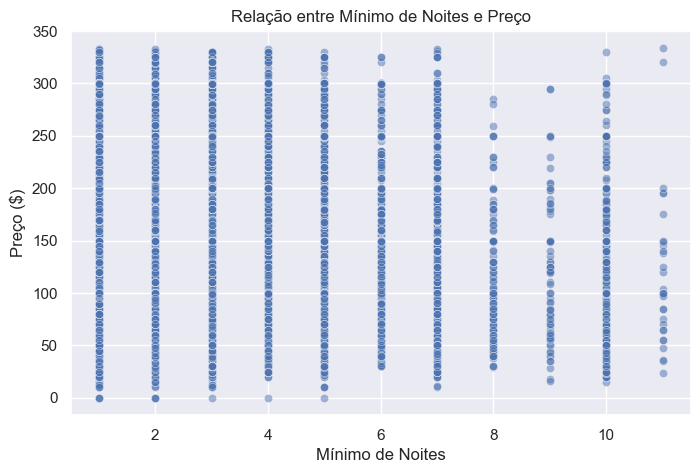

In [77]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=precificacao_filtered["minimo_noites"], y=precificacao_filtrada["price"], alpha=0.5)
plt.title("Relação entre Mínimo de Noites e Preço")
plt.xlabel("Mínimo de Noites")
plt.ylabel("Preço ($)")

plt.show()

O número mínimo de noites tem pouca influência no preço dos imóveis.

##### Relação entre disponibilidade e preço

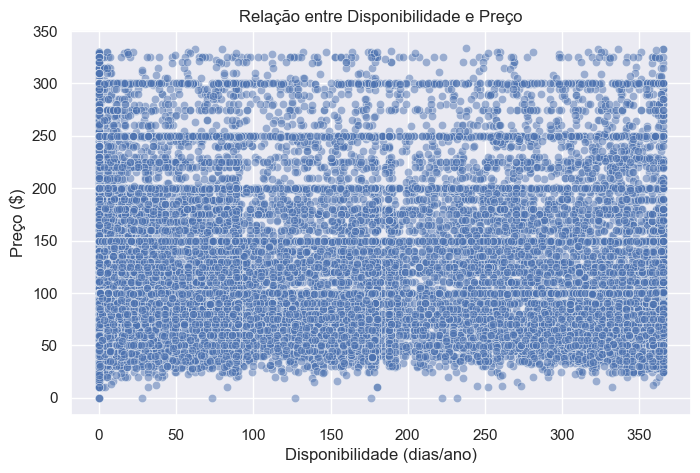

In [89]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=precificacao_filtered["disponibilidade_365"], y=precificacao_filtrada["price"], alpha=0.5)
plt.title("Relação entre Disponibilidade e Preço")
plt.xlabel("Disponibilidade (dias/ano)")
plt.ylabel("Preço ($)")

plt.show()

A disponibilidade tem pouca influência no preço dos imóveis.

##### Correlação entre mínimo de noites, disponibilidade e preço

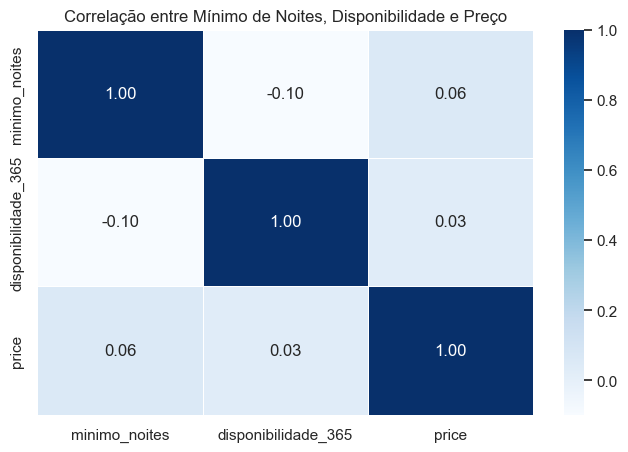

In [92]:
corr_matrix_2 = precificacao_filtrada[['minimo_noites', 'disponibilidade_365', 'price']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix_2, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title('Correlação entre Mínimo de Noites, Disponibilidade e Preço')

plt.show()

A análise da matriz de correlação sugere que o número mínimo de noites e a disponibilidade, individualmente, têm pouca influência no preço dos imóveis. As correlações são de 0,06 e 0,03, respectivamente, o que sugere que esses fatores não são determinantes para o preço. É necessário considerar outros fatores para entender melhor a formação dos preços, como localização, tipo, etc.

#### c) Existe algum padrão no texto do nome do local para lugares de mais alto valor?

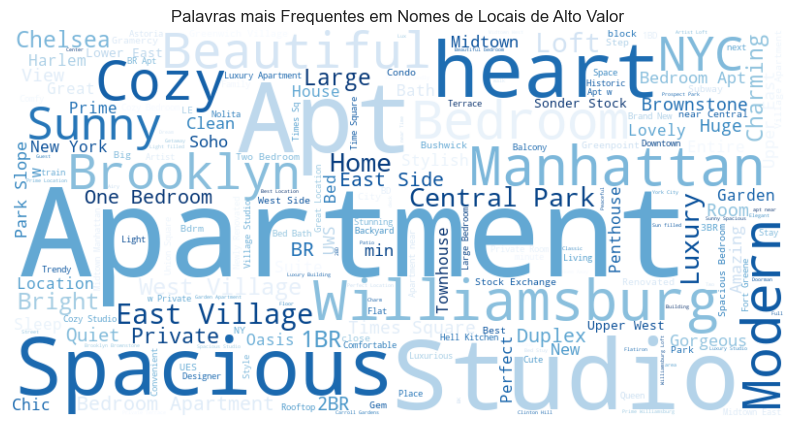

In [157]:
# Filtrando
price_alto = precificacao_filtrada[precificacao_filtrada['price'] > precificacao_filtrada['price'].quantile(0.75)]

# Concatenando
texto = ' '.join(price_alto['nome'].dropna().astype(str))

# Word cloud
wordcloud = WordCloud(width=800, height=400,background_color='white', colormap='Blues').generate(texto)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais Frequentes em Nomes de Locais de Alto Valor')
plt.show()

Observando a nuvem de palavras, podemos identificar algumas palavras-chave que podem estar associadas a lugares de maior valor:

- **Apartment**: A palavra Apartment, sugere que esse tipo de acomodação é comum em locais de alto valor.

- **Studio**: A palavra Studio, também aparece com destaque, indicando que estúdios podem ter um valor considerável.

- **Manhattan**: A presença da palavra Manhattan sugere que imóveis localizados nesse bairro podem ter um valor mais elevado. Manhattan é conhecido por ser um dos bairros mais caros de Nova York.

- **Bedroom**: A palavra Bedroom, aparece diversas vezes, o que é natural, já que o número de quartos é uma característica importante dos imóveis.

- **Beautiful, Spacious, Modern, Luxury, Chic**: Essas palavras, são frequentemente usados para descrever imóveis de alto valor, o que sugere que essas características são valorizadas.

Além de Manhattan, outros bairros como **Chelsea, Brooklyn, Williamsburg** e **East Village** também aparecem na nuvem de palavras, indicando que essas regiões também podem ter imóveis de alto valor.

A menção a **Central Park** sugere que a proximidade de pontos turísticos pode ser um fator de valorização dos imóveis.

## 3. 

#### Modelo Preditivo

In [115]:
# Variáveis escolhidas: localização (id, host_id, latitude, longitude, room_type, minimo_noites, disponibilidade_365, numero_de_reviews)

# Criando variáveis dummies para 'room_type'
precificacao_filtrada_dummies = pd.get_dummies(precificacao_filtrada, columns=['room_type'], drop_first=False)

# Atualizando a lista de features
features = ['id', 'host_id', 'latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'disponibilidade_365'] + \
           [col for col in precificacao_filtrada_dummies.columns if 'room_type_' in col]

# Criando os conjuntos de treino e teste
X = precificacao_filtrada_dummies[features]
y = precificacao_filtrada_dummies['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando desempenho
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro médio absoluto do modelo: {mae:.2f}")

Erro médio absoluto do modelo: 32.60


Variáveis escolhidas:

- id: Embora o id do imóvel possa não ter um impacto direto no preço, ele pode ser útil, pois permite identificar e diferenciar anúncios individuais de forma precisa.
- host_id: Representa o usuário ou entidade que criou e está gerenciando o anúncio. Ele permite rastrear a origem do anúncio e identificar o responsável por ele.
- latitude e longitude: Capturam a localização, que é um fator importante no preço.
- minimo_noites: Pode influenciar na precificação, já que estadias mais longas podem ter descontos.
- numero_de_reviews: Pode indicar a popularidade do imóvel e impactar o preço.
- disponibilidade_365: Mede quantos dias no ano o imóvel está disponível para aluguel, podendo afetar a demanda.
- room_type (transformado em dummies): Representa o tipo de acomodação, diferenciando entre room_type_Entire home/apt, room_type_Private room, room_type_Shared room.

Este é um problema de **REGRESSÃO**, pois o objetivo é prever um valor numérico contínuo, o preço.

O modelo escolhido foi o Random Forest Regressor.

Prós:
- Captura relações complexas entre as variáveis sem necessidade de muitas transformações.
- Resistente a outliers e menos sensível a overfitting do que árvores individuais.
- Lida bem com variáveis categóricas e numéricas.

Contras:
- Mais lento do que modelos lineares para grandes bases de dados.
- Menos interpretável, já que é um modelo de conjunto com várias árvores.

A métrica escolhida foi o Erro Médio Absoluto (MAE - Mean Absolute Error), porque:
- Mede a diferença média absoluta entre os preços reais e previstos.
- Mantém a interpretação em unidade monetária.
- Penaliza menos os grandes erros extremos do que o erro quadrático médio (RMSE).

Se o MAE for baixo, significa que o modelo faz previsões próximas ao valor real.

In [118]:
print(precificacao_filtrada_dummies.columns)

precificacao_filtrada_dummies.info()

Index(['id', 'nome', 'host_id', 'bairro_group', 'bairro', 'latitude',
       'longitude', 'price', 'minimo_noites', 'numero_de_reviews',
       'ultima_review', 'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 39737 entries, 0 to 48893
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             39737 non-null  int64  
 1   nome                           39737 non-null  object 
 2   host_id                        39737 non-null  int64  
 3   bairro_group                   39737 non-null  object 
 4   bairro                         39737 non-null  object 
 5   latitude                       39737 non-null  float64
 6   longitude                      39737 non-null  float64
 7 

## 4.

In [121]:
# Características do apartamento
apartamento = {
    'id': 2595,
    'host_id': 2845,
    'latitude': 40.75362,
    'longitude': -73.98377,
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'disponibilidade_365': 355,
    'room_type_Entire home/apt': 1,  # Como é "Entire home/apt", a variável dummies será 1
    'room_type_Private room': 0,     # As demais serão 0
    'room_type_Shared room': 0
}

# Transformando em DataFrame para passar para o modelo
apartamento_precificacao = pd.DataFrame([apartamento])

# Fazendo a previsão
price_previsto = model.predict(apartamento_precificacao)

print(f"Preço sugerido para o apartamento: ${price_previsto[0]:.2f}")

Preço sugerido para o apartamento: $226.03


## 5. Salvando modelo em formato .pkl

In [126]:
joblib.dump(model, 'modelo_precificacao.pkl')

print('Modelo salvo com sucesso!')

Modelo salvo com sucesso!
